In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
!pip install xgboost
!pip install catboost
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Online_payment_fraud.csv')

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
832015,41,CASH_IN,187538.25,C2022442525,462737.42,650275.67,C1922628637,389124.98,201586.72,0.0,0.0
832016,41,CASH_IN,14271.94,C1848797994,650275.67,664547.61,C625174366,104981.51,90709.57,0.0,0.0
832017,41,CASH_IN,130356.15,C1341998742,664547.61,794903.77,C647675234,1346637.22,1216281.07,0.0,0.0
832018,41,CASH_IN,141486.15,C1903469899,794903.77,936389.91,C2047015557,3673238.21,3531752.07,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832020 entries, 0 to 832019
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            832020 non-null  int64  
 1   type            832020 non-null  object 
 2   amount          832020 non-null  float64
 3   nameOrig        832019 non-null  object 
 4   oldbalanceOrg   832019 non-null  float64
 5   newbalanceOrig  832019 non-null  float64
 6   nameDest        832019 non-null  object 
 7   oldbalanceDest  832019 non-null  float64
 8   newbalanceDest  832019 non-null  float64
 9   isFraud         832019 non-null  float64
 10  isFlaggedFraud  832019 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 69.8+ MB


In [ ]:
data.shape

(832020, 11)

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,832020.000000,8.320200e+05,8.320190e+05,8.320190e+05,8.320190e+05,8.320190e+05,832019.000000,832019.0
mean,21.584710,1.637968e+05,8.767834e+05,8.974072e+05,9.850037e+05,1.135179e+06,0.000567,0.0
std,10.777414,2.661307e+05,2.956198e+06,2.993124e+06,2.314460e+06,2.447449e+06,0.023811,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,13.000000,1.302497e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,18.000000,8.028382e+04,1.632800e+04,0.000000e+00,1.274457e+05,2.270615e+05,0.000000,0.0
75%,34.000000,2.208189e+05,1.473902e+05,1.888423e+05,9.185420e+05,1.178578e+06,0.000000,0.0
max,41.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.205466e+07,1.000000,0.0


In [ ]:
missing = data.isnull().sum()
missing

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
for column in data.columns:
  zero_count = (data[column] == 0).sum()
  print(f"Zeros in column '{column}': {zero_count}")

Zeros in column 'step': 0
Zeros in column 'type': 0
Zeros in column 'amount': 0
Zeros in column 'nameOrig': 0
Zeros in column 'oldbalanceOrg': 272372
Zeros in column 'newbalanceOrig': 462471
Zeros in column 'nameDest': 0
Zeros in column 'oldbalanceDest': 342120
Zeros in column 'newbalanceDest': 320178
Zeros in column 'isFraud': 831547
Zeros in column 'isFlaggedFraud': 832019


In [ ]:
data = data[data['amount']>0].copy()

In [ ]:
unique_values_type = data['type'].unique()
unique_values_isFraud = data['isFraud'].unique()
unique_values_isFlaggedFraud = data['isFlaggedFraud'].unique()

# Display the unique values for each column
print("Unique values in 'type' column:", unique_values_type)
print("Unique values in 'isFraud' column:", unique_values_isFraud)
print("Unique values in 'isFlaggedFraud' column:", unique_values_isFlaggedFraud)

Unique values in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in 'isFraud' column: [ 0.  1. nan]
Unique values in 'isFlaggedFraud' column: [ 0. nan]


In [ ]:
data['type'] = data['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})

Value Counts:
 isFraud
0.0    831547
1.0       472
Name: count, dtype: int64


<ipython-input-24-6717d4001838>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')


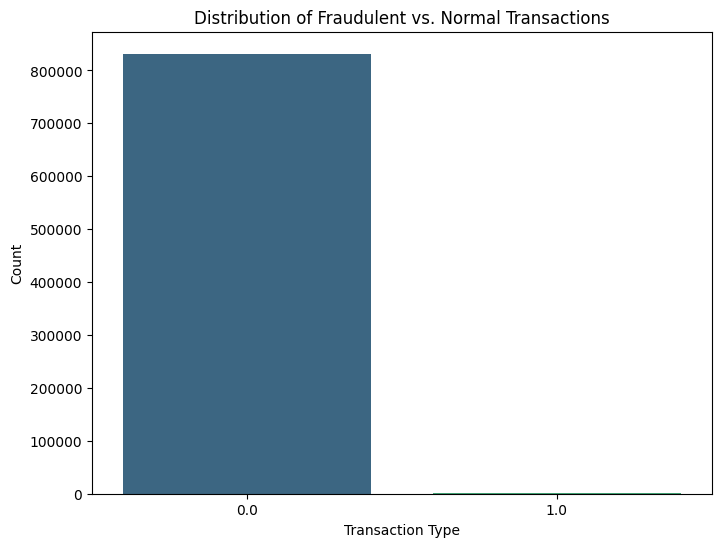

In [ ]:
value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)

# Plot a count plot to visualize the distribution of fraudulent vs. normal transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

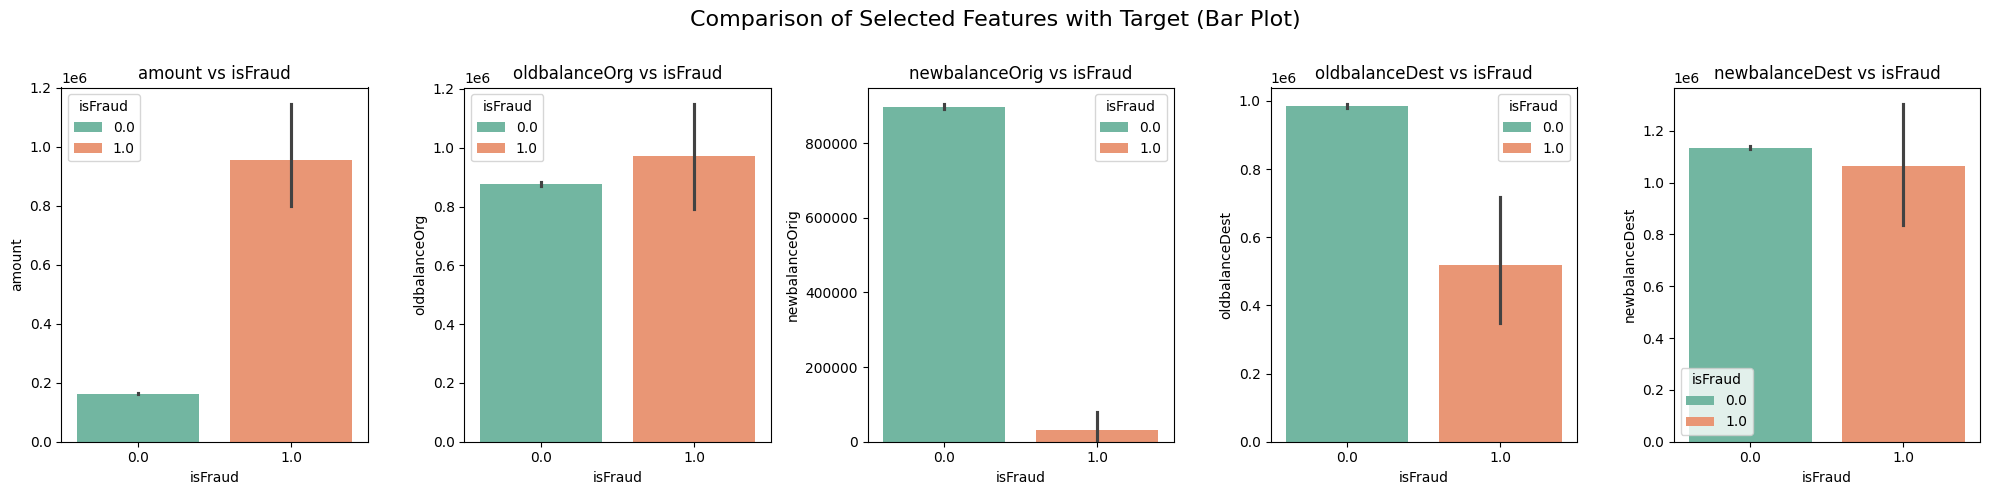

In [ ]:
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create subplots (number of subplots is equal to the number of selected features)
fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))

# Loop through each selected feature to create individual bar plots
for i, feature in enumerate(selected_features):
    sns.barplot(x=data['isFraud'], y=data[feature], hue=data['isFraud'], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs isFraud')  # Title for each subplot
    axes[i].set_xlabel('isFraud')
    axes[i].set_ylabel(feature)

# Add a title for the overall figure and adjust layout for better spacing
plt.suptitle("Comparison of Selected Features with Target (Bar Plot)", fontsize=16)
plt.tight_layout()
plt.show()

Value Counts:
 type
0    299850
1    275651
2    182069
3     68879
4      5571
Name: count, dtype: int64


<ipython-input-26-c77b0b7f9546>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')


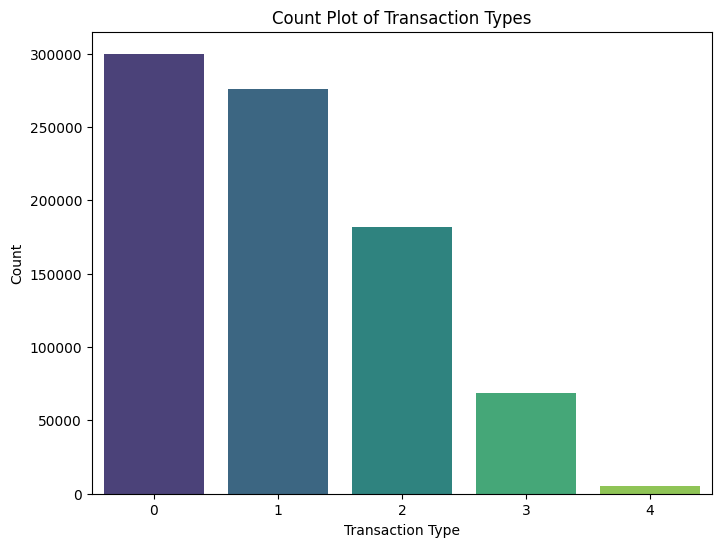

In [ ]:
value_counts = data['type'].value_counts()
print("Value Counts:\n", value_counts)

# Plot a count plot to visualize transaction type popularity
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

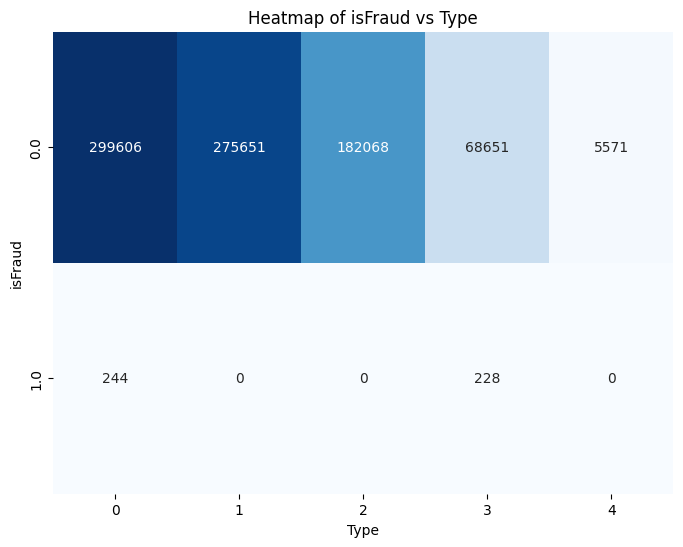

In [ ]:
contingency_table = pd.crosstab(data['isFraud'], data['type'])

# Plot heatmap for the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Heatmap of isFraud vs Type')
plt.xlabel('Type')
plt.ylabel('isFraud')
plt.show()

In [ ]:
transaction_type_weights = {
    0: 2.0,
    1: 1.0,
    2: 1.0,
    3: 2.0,
    4: 1.0
}
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

#Initializing scalers
robust_scale = RobustScaler()
data['amount_scaled'] = robust_scale.fit_transform(data[['amount']])

#Applying log transformations to prevent zero dominance
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])

print(data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log',
                        'oldbalanceDest_log', 'newbalanceDest_log']].describe())

       amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
count   8.320200e+05      832019.000000       832019.000000   
mean    4.019027e-01           7.556703            5.566925   
std     1.280744e+00           5.727452            6.406728   
min    -3.863622e-01           0.000000            0.000000   
25%    -3.236806e-01           0.000000            0.000000   
50%    -3.501528e-17           9.700698            0.000000   
75%     6.763194e-01          11.900846           12.148673   
max     4.773825e+01          17.477518           17.477693   

       oldbalanceDest_log  newbalanceDest_log  
count       832019.000000       832019.000000  
mean             7.821498            8.330727  
std              6.667966            6.691130  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%             11.755453           12.332981  
75%             13.730544           13.979820  
max             17.540787           17.554481  


In [ ]:
# Define amount bins and labels
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']

# Bin the transaction amounts
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

# Calculate fraud rate per bin (in a separate DataFrame)
fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(
    columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}
)
fraud_rate['Fraud Rate'] = fraud_rate['Fraudulent Transactions'] / fraud_rate['Total Transactions']

# Reset index for readability
fraud_rate = fraud_rate.reset_index()

# Display fraud rate per bin
print("Fraud Rate per Bin:")
print(fraud_rate)

Fraud Rate per Bin:
  amount_bin  Total Transactions  Fraudulent Transactions  Fraud Rate
0      0-100                1846                      0.0    0.000000
1    100-500                7437                     12.0    0.001614
2     500-1K                9311                      2.0    0.000215
3      1K-5K               73601                     16.0    0.000217
4     5K-10K               78345                     12.0    0.000153
5    10K-50K              191655                     95.0    0.000496
6   50K-100K               87501                     36.0    0.000411
7      100K+              367153                    187.0    0.000509
8     1000K+               15170                    112.0    0.007383


<ipython-input-30-ccc959e97cd6>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(


In [ ]:
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

# Assign bin weights to the data DataFrame
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

<ipython-input-32-cdbc13382d3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')


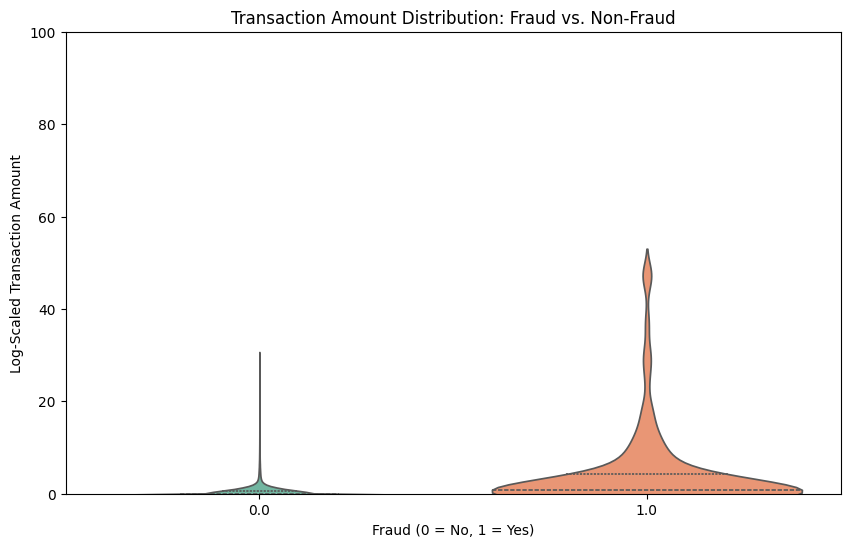

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')

plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Log-Scaled Transaction Amount")
plt.ylim(0, 100)
plt.show()

<ipython-input-33-55b61704d99d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')


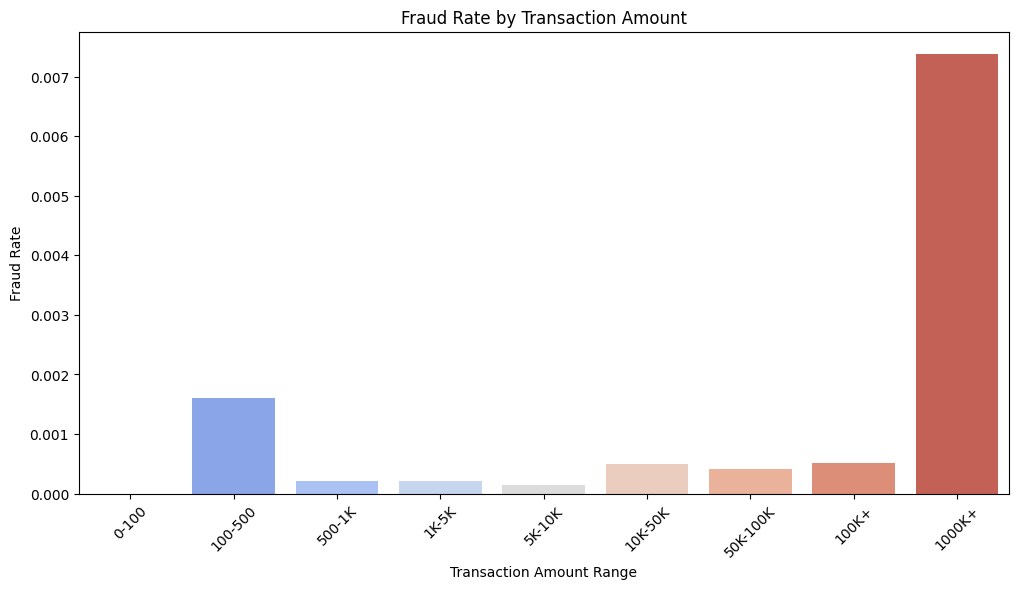

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')

plt.title('Fraud Rate by Transaction Amount')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_type_weight,amount_scaled,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log,amount_bin,bin_weight
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0,1.0,-0.339010,12.044359,11.984786,0.000000,0.000000,5K-10K,1.0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0,1.0,-0.377391,9.964112,9.872292,0.000000,0.000000,1K-5K,1.0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0,2.0,-0.385492,5.204007,0.000000,0.000000,0.000000,100-500,1.0
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0,2.0,-0.385492,5.204007,0.000000,9.960954,0.000000,100-500,1.0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0,1.0,-0.330210,10.634773,10.305174,0.000000,0.000000,10K-50K,1.0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0,1.0,-0.348740,10.894162,10.737337,0.000000,0.000000,5K-10K,1.0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0,1.0,-0.352157,12.118312,12.078740,0.000000,0.000000,5K-10K,1.0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0,1.0,-0.348529,12.078740,12.033067,0.000000,0.000000,5K-10K,1.0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0,1.0,-0.366996,7.890583,0.000000,0.000000,0.000000,1K-5K,1.0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0,1.0,-0.360675,10.638760,10.501863,10.643017,10.605341,5K-10K,1.0


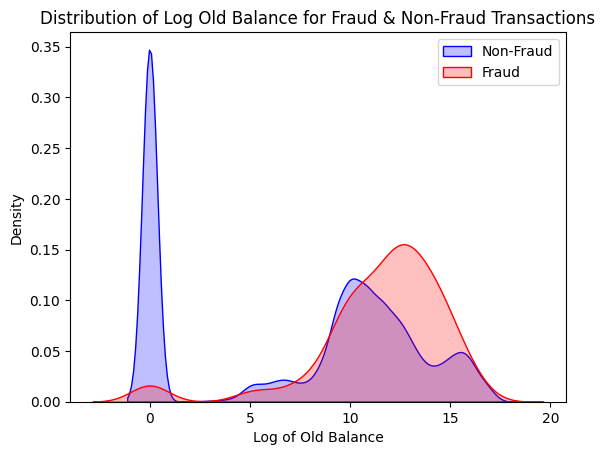

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='oldbalanceOrg_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='oldbalanceOrg_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of Old Balance")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

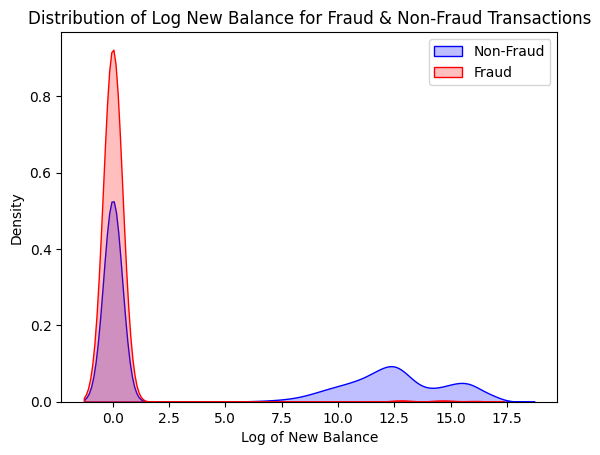

In [ ]:
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='newbalanceOrig_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='newbalanceOrig_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of New Balance")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

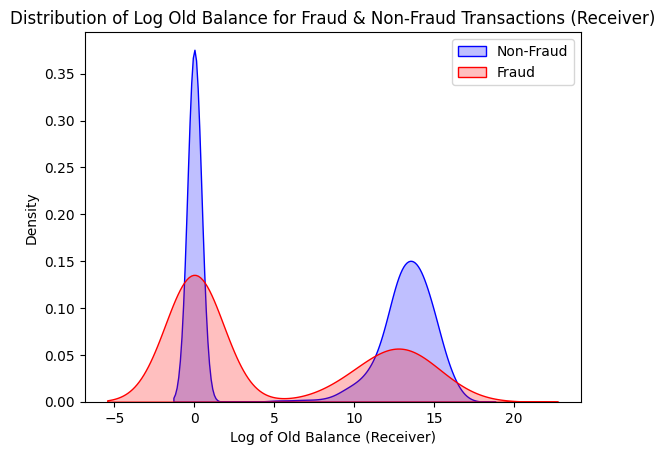

In [ ]:
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='oldbalanceDest_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='oldbalanceDest_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of Old Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

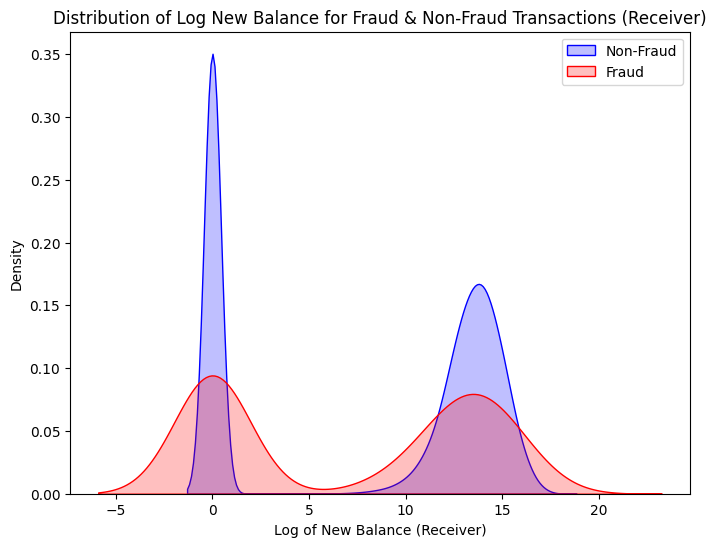

In [ ]:
plt.figure(figsize = (8,6))
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='newbalanceDest_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='newbalanceDest_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of New Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

In [ ]:
data['combined_weight'] = data['transaction_type_weight'] * data['bin_weight']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']] = imputer.fit_transform(data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']])

In [ ]:
data['balance_diff_Org'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_Dest']= data['oldbalanceDest'] - data['newbalanceDest']

In [ ]:
data['balance_diff_Org_log'] = np.log1p(data['balance_diff_Org'])  # Log(x+1) for non-negative values
data['balance_diff_Dest_log'] = np.log1p(data['balance_diff_Dest'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
columns_to_scale = [
    'balance_diff_Org_log',
    'balance_diff_Dest_log',
    'balance_diff_Org'
]
columns_to_scale = [col for col in columns_to_scale if col in data.columns]

scaler = RobustScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print("Scaling complete. First few rows of scaled data:")
print(data.head())

Scaling complete. First few rows of scaled data:
   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     1   9839.64  C1231006815       170136.0       160296.36   
1     1     1   1864.28  C1666544295        21249.0        19384.72   
2     1     3    181.00  C1305486145          181.0            0.00   
3     1     0    181.00   C840083671          181.0            0.00   
4     1     1  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  ...  \
0  M1979787155             0.0             0.0      0.0  ...   
1  M2044282225             0.0             0.0      0.0  ...   
2   C553264065             0.0             0.0      1.0  ...   
3    C38997010         21182.0             0.0      1.0  ...   
4  M1230701703             0.0             0.0      0.0  ...   

   newbalanceOrig_log  oldbalanceDest_log  newbalanceDest_log  amount_bin  \
0           11.984786            0.000000                 0.0 

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'transaction_type_weight', 'amount_scaled',
       'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log',
       'newbalanceDest_log', 'amount_bin', 'bin_weight', 'combined_weight',
       'balance_diff_Org', 'balance_diff_Dest', 'balance_diff_Org_log',
       'balance_diff_Dest_log'],
      dtype='object')

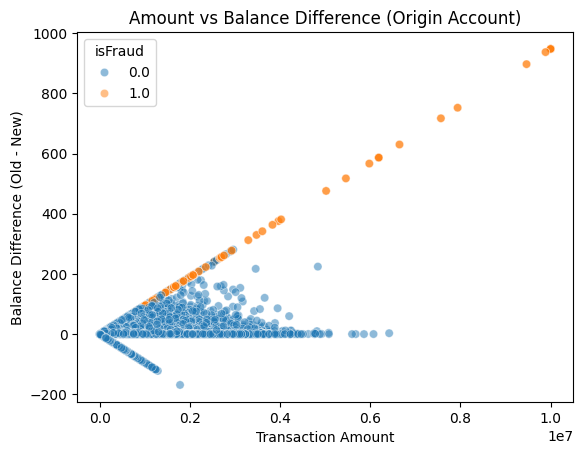

In [ ]:
sns.scatterplot(x='amount', y='balance_diff_Org', hue='isFraud', data=data, alpha=0.5)
plt.title('Amount vs Balance Difference (Origin Account)')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.show()

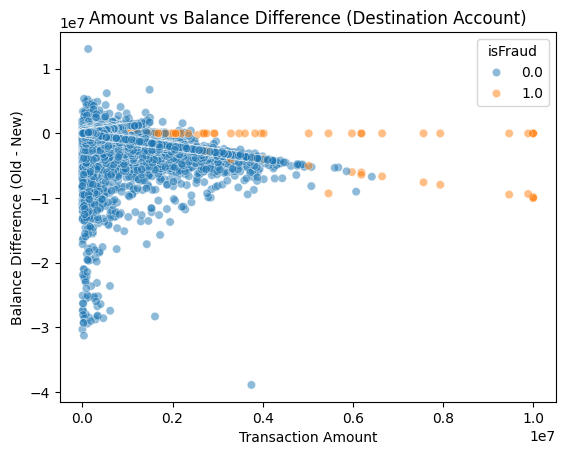

In [ ]:
sns.scatterplot(x='amount', y='balance_diff_Dest', hue='isFraud', data=data, alpha=0.5)

plt.title('Amount vs Balance Difference (Destination Account)')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.show()

In [ ]:
columns_to_drop = ['step','amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud','transaction_type_weight','bin_weight','amount_bin',"nameOrig","nameDest" ]
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
0     1      0.0      -0.339010          12.044359           11.984786   
1     1      0.0      -0.377391           9.964112            9.872292   
2     3      1.0      -0.385492           5.204007            0.000000   
3     0      1.0      -0.385492           5.204007            0.000000   
4     1      0.0      -0.330210          10.634773           10.305174   

   oldbalanceDest_log  newbalanceDest_log  combined_weight  balance_diff_Org  \
0            0.000000                 0.0              1.0          0.932813   
1            0.000000                 0.0              1.0          0.176737   
2            0.000000                 0.0              2.0          0.017159   
3            9.960954                 0.0              2.0          0.017159   
4            0.000000                 0.0              1.0          1.106158   

   balance_diff_Dest  balance_diff_Org_log  balance_diff_Dest_log  
0     

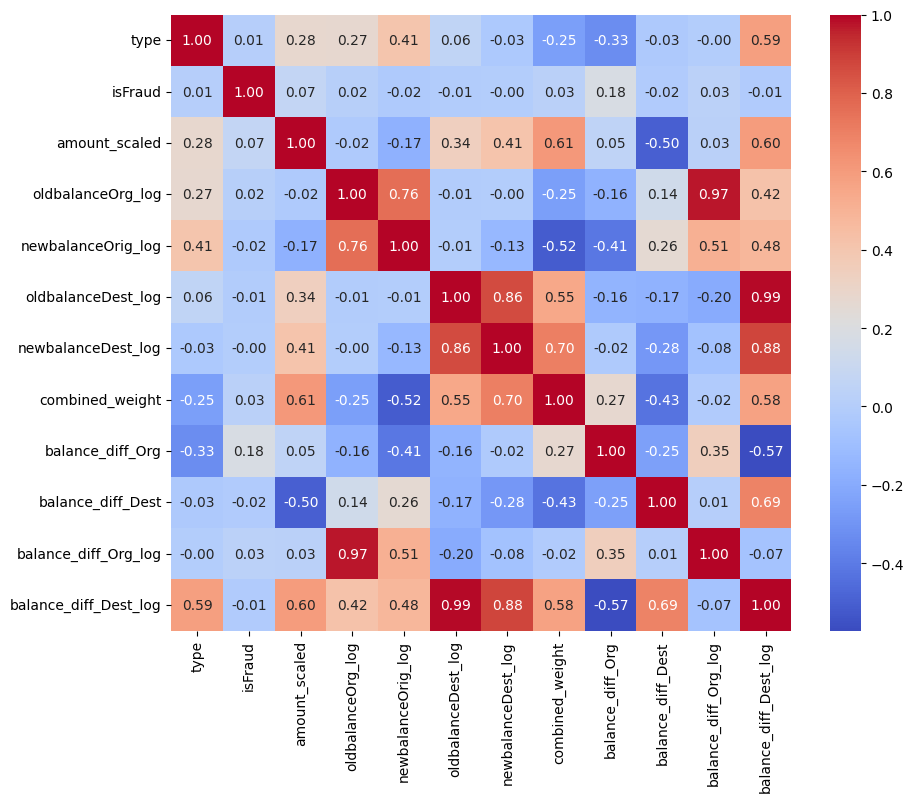

In [ ]:
corr = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
columns_to_drop = [ 'balance_diff_Dest','balance_diff_Dest_log','balance_diff_Org_log','newbalanceDest_log']
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
0     1      0.0      -0.339010          12.044359           11.984786   
1     1      0.0      -0.377391           9.964112            9.872292   
2     3      1.0      -0.385492           5.204007            0.000000   
3     0      1.0      -0.385492           5.204007            0.000000   
4     1      0.0      -0.330210          10.634773           10.305174   

   oldbalanceDest_log  combined_weight  balance_diff_Org  
0            0.000000              1.0          0.932813  
1            0.000000              1.0          0.176737  
2            0.000000              2.0          0.017159  
3            9.960954              2.0          0.017159  
4            0.000000              1.0          1.106158  


In [ ]:
data.columns

Index(['type', 'isFraud', 'amount_scaled', 'oldbalanceOrg_log',
       'newbalanceOrig_log', 'oldbalanceDest_log', 'combined_weight',
       'balance_diff_Org'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Grab the numerical columns we want to check for multicollinearity
X = data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'balance_diff_Org']]
X_vif = X.replace([np.inf, -np.inf], np.nan).dropna()
# Set up a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns  # List the features we're checking
# Recalculate VIF using the cleaned data
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(vif_data)

              Feature       VIF
0       amount_scaled  1.321278
1   oldbalanceOrg_log  5.625361
2  newbalanceOrig_log  5.509575
3  oldbalanceDest_log  1.889164
4    balance_diff_Org  1.359247


In [ ]:
columns_to_drop = ['oldbalanceOrg_log']
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  newbalanceOrig_log  oldbalanceDest_log  \
0     1      0.0      -0.339010           11.984786            0.000000   
1     1      0.0      -0.377391            9.872292            0.000000   
2     3      1.0      -0.385492            0.000000            0.000000   
3     0      1.0      -0.385492            0.000000            9.960954   
4     1      0.0      -0.330210           10.305174            0.000000   

   combined_weight  balance_diff_Org  
0              1.0          0.932813  
1              1.0          0.176737  
2              2.0          0.017159  
3              2.0          0.017159  
4              1.0          1.106158  


In [ ]:
data.columns

Index(['type', 'isFraud', 'amount_scaled', 'newbalanceOrig_log',
       'oldbalanceDest_log', 'combined_weight', 'balance_diff_Org'],
      dtype='object')

In [ ]:
data

,type,isFraud,amount_scaled,newbalanceOrig_log,oldbalanceDest_log,combined_weight,balance_diff_Org
0,1,0.0,-0.339010,11.984786,0.000000,1.0,0.932813
1,1,0.0,-0.377391,9.872292,0.000000,1.0,0.176737
2,3,1.0,-0.385492,0.000000,0.000000,2.0,0.017159
3,0,1.0,-0.385492,0.000000,9.960954,2.0,0.017159
4,1,0.0,-0.330210,10.305174,0.000000,1.0,1.106158
...,...,...,...,...,...,...,...
832015,2,0.0,0.516158,13.385153,12.871658,1.5,-17.778922
832016,2,0.0,-0.317680,13.406863,11.561549,1.0,-1.353002
832017,2,0.0,0.240971,13.585978,14.113122,1.5,-12.357970
832018,2,0.0,0.294534,13.749788,15.116584,1.5,-13.413109


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Data preparation
data = data.dropna(subset=['isFraud'])
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Class balancing
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_under, y_under = rus.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.5, k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

combined_weight_resampled = np.ones(len(X_resampled))

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_resampled, y_resampled, combined_weight_resampled,
    test_size=0.2, stratify=y_resampled, random_state=42
)

# Models and hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(loss='log_loss', penalty='l1', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}

tuning_params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6], 'subsample': [0.8, 1.0]},
    'CatBoost': {'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1], 'iterations': [200, 500]}
}

# Training loop
for name, model in models.items():
    print(f"\n--- {name} ---")
    try:
        if name in tuning_params:
            search = GridSearchCV(model, tuning_params[name], cv=3, scoring='accuracy', n_jobs=-1)
            search.fit(X_train, y_train, sample_weight=weights_train)
            model = search.best_estimator_
            print(f"Best Params: {search.best_params_}")
        else:
            model.fit(X_train, y_train, sample_weight=weights_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy:  {test_acc:.4f}")

        # Report and Confusion Matrix
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))

    except Exception as e:
        print(f"{name} failed: {e}")



--- Logistic Regression ---
Best Params: {'C': 10}
Train Accuracy: 0.9280
Test Accuracy:  0.9068
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       944
         1.0       0.90      0.81      0.85       472

    accuracy                           0.91      1416
   macro avg       0.91      0.88      0.89      1416
weighted avg       0.91      0.91      0.91      1416

Confusion Matrix:
[[904  40]
 [ 92 380]]

--- SGD Classifier ---
Best Params: {'alpha': 0.0001}
Train Accuracy: 0.9368
Test Accuracy:  0.9223
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       944
         1.0       0.87      0.91      0.89       472

    accuracy                           0.92      1416
   macro avg       0.91      0.92      0.91      1416
weighted avg       0.92      0.92      0.92      1416

Confusion Matrix:
[[878  66]
 [ 44 428]]

--- Decision Tree 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:22:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Train Accuracy: 0.9944
Test Accuracy:  0.9866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       944
         1.0       0.97      0.99      0.98       472

    accuracy                           0.99      1416
   macro avg       0.98      0.99      0.98      1416
weighted avg       0.99      0.99      0.99      1416

Confusion Matrix:
[[931  13]
 [  6 466]]

--- CatBoost ---
Best Params: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
Train Accuracy: 0.9988
Test Accuracy:  0.9866
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       944
         1.0       0.97      0.99      0.98       472

    accuracy                           0.99      1416
   macro avg       0.98      0.99      0.98      1416
weighted avg       0.99      0.99      0.99   

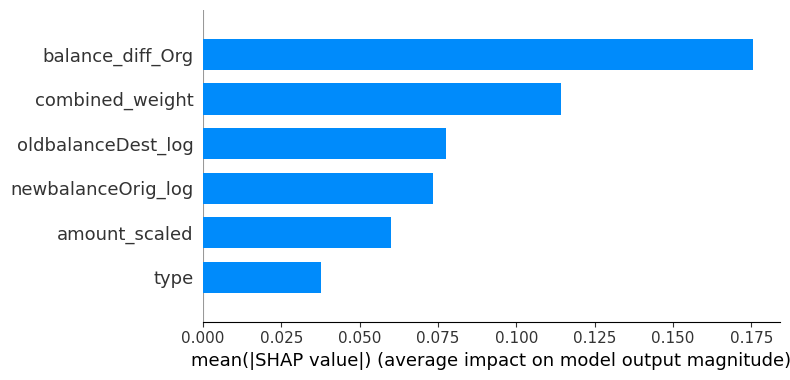

<Figure size 640x480 with 0 Axes>

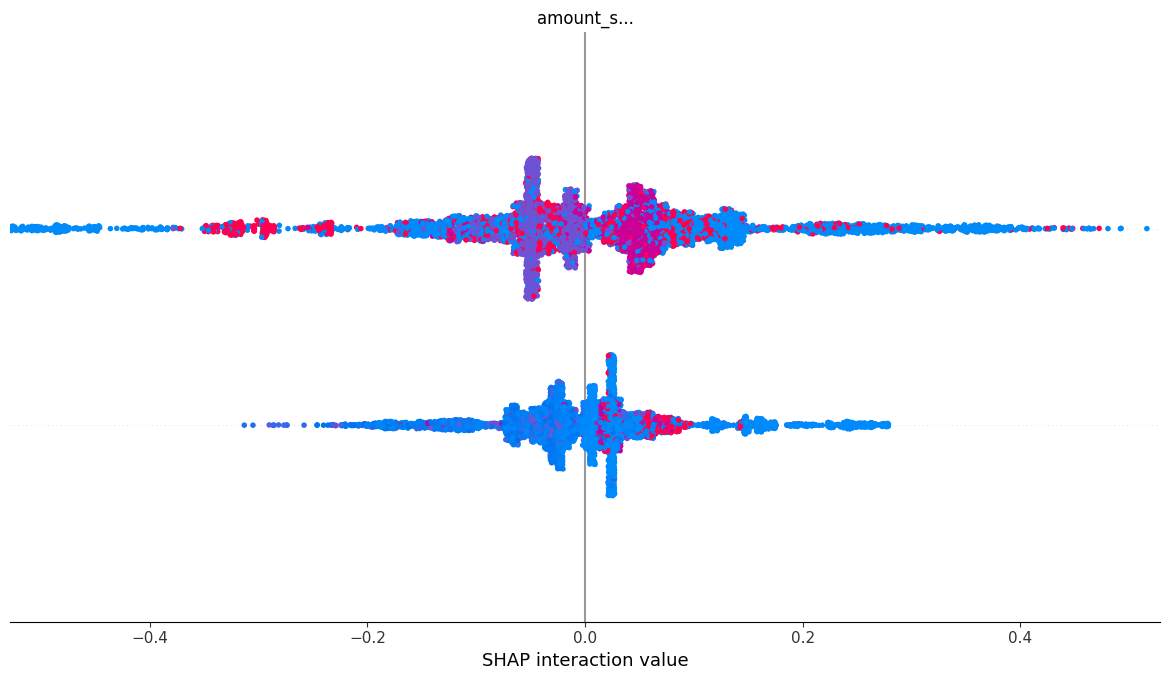

🔍 Top 2 most important features:
            Feature  Importance
5  balance_diff_Org    0.175341
4   combined_weight    0.114331


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Assume 'data', 'X', 'y', 'X_resampled', 'y_resampled', 'combined_weight_resampled' are already defined from previous cells

# --- Previous code for data preparation and train/test split ---
# Data preparation
data = data.dropna(subset=['isFraud'])
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Class balancing
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_under, y_under = rus.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.5, k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

combined_weight_resampled = np.ones(len(X_resampled))

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_resampled, y_resampled, combined_weight_resampled,
    test_size=0.2, stratify=y_resampled, random_state=42
)
# --- End of previous code ---


# Recreate X_train DataFrame using original feature names (before resampling)
# Ensure X_train_named has the correct column names from the original features
X_columns = X.columns
X_train_named = pd.DataFrame(X_train, columns=X_columns)

# Re-train RandomForestClassifier for SHAP (if model was tuned inside loop, safest to re-train explicitly)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_named, y_train)

# SHAP explanation
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values
# For a multi-class TreeExplainer, shap_values will be a list of arrays or a single array
# with shape (n_instances, n_features, n_classes).
# If it's a list of arrays, shap_values[i] corresponds to the SHAP values for class i.
# If it's a single array, shap_values[:, :, i] corresponds to the SHAP values for class i.

# Based on the global variable `shap_values` shape (5664, 6, 2), it's a single array.
# Select SHAP values for class 1 (Fraud), which is the second dimension (index 1)
# then calculate the mean absolute value across instances (axis 0).
shap_values = explainer.shap_values(X_train_named)
# Check the structure of shap_values to be sure - likely (n_instances, n_features, n_classes)
# To get importance for class 1 (Fraud), take the mean absolute value across instances (axis 0)
# from the slice corresponding to class 1 (index 1 in the last dimension).
shap_importance = np.abs(shap_values[:, :, 1]).mean(axis=0)


# Plot SHAP summary - Provide the full shap_values list or array and the data matrix
# SHAP will automatically handle the multi-class output for the plot
# If shap_values is a list of arrays (one for each class), pass the list:
# shap.summary_plot(shap_values, X_train_named)
# If shap_values is a single array (n_instances, n_features, n_classes), pass the array:
shap.summary_plot(shap_values[:, :, 1], X_train_named, plot_type="bar") # Example for class 1 bar plot
# Or for a general summary plot that handles multi-class:
shap.summary_plot(shap_values, X_train_named)


# Rank top 2 features using the calculated importance for class 1
feature_importance = pd.DataFrame({
    'Feature': X_train_named.columns,
    'Importance': shap_importance
}).sort_values(by='Importance', ascending=False)

print("🔍 Top 2 most important features:")
print(feature_importance.head(2))


--- Logistic Regression ---
Best Params: {'C': 10}
Train Accuracy: 0.9280
Test Accuracy:  0.9068
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       944
         1.0       0.90      0.81      0.85       472

    accuracy                           0.91      1416
   macro avg       0.91      0.88      0.89      1416
weighted avg       0.91      0.91      0.91      1416

Confusion Matrix:
[[904  40]
 [ 92 380]]


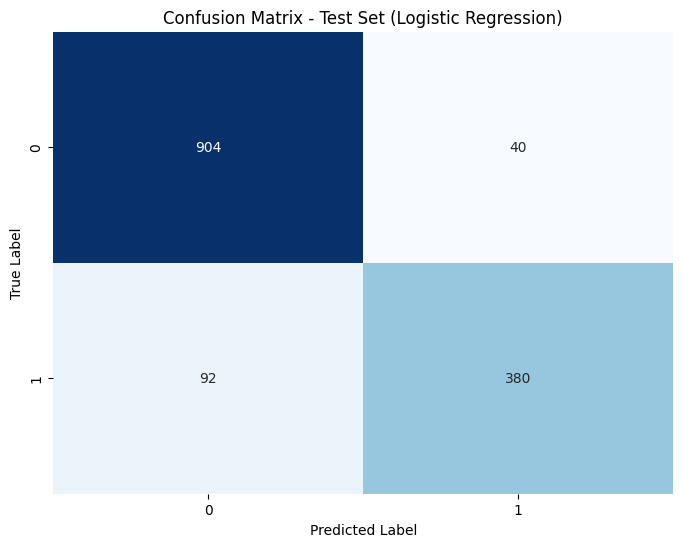

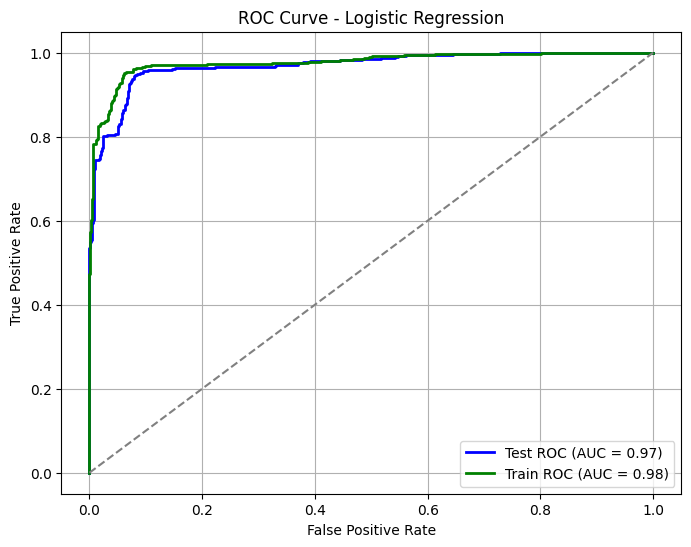

Train AUC Score: 0.9771
Test AUC Score:  0.9697

--- SGD Classifier ---
Best Params: {'alpha': 0.0001}
Train Accuracy: 0.9368
Test Accuracy:  0.9223
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       944
         1.0       0.87      0.91      0.89       472

    accuracy                           0.92      1416
   macro avg       0.91      0.92      0.91      1416
weighted avg       0.92      0.92      0.92      1416

Confusion Matrix:
[[878  66]
 [ 44 428]]


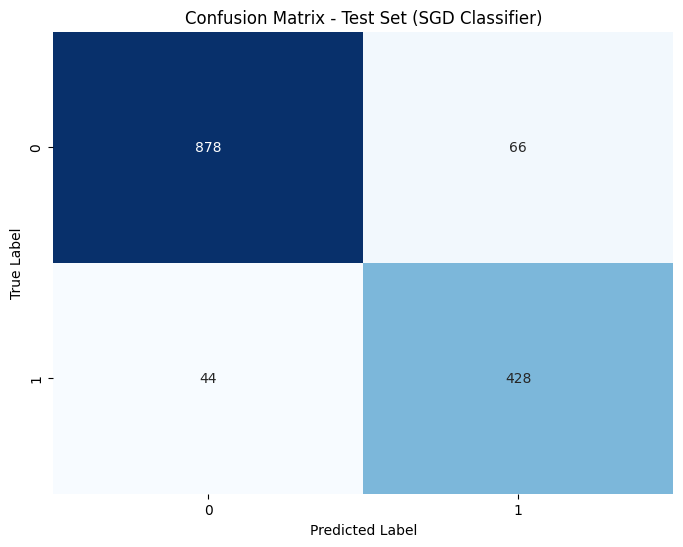

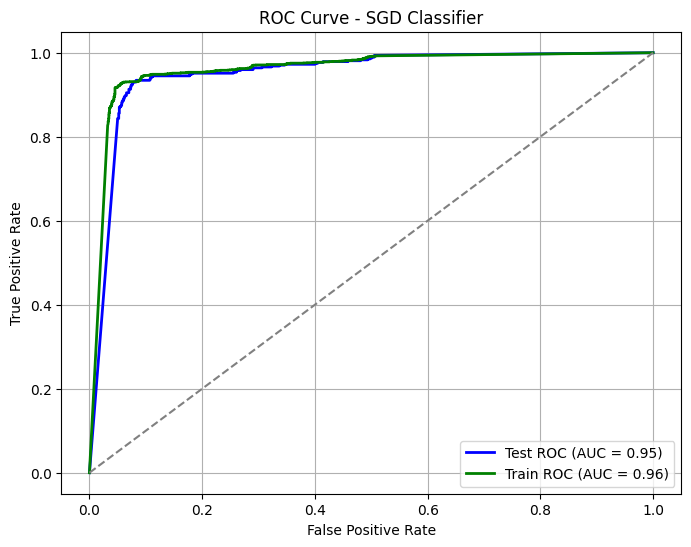

Train AUC Score: 0.9603
Test AUC Score:  0.9500

--- Decision Tree ---
Train Accuracy: 1.0000
Test Accuracy:  0.9859
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       944
         1.0       0.98      0.97      0.98       472

    accuracy                           0.99      1416
   macro avg       0.99      0.98      0.98      1416
weighted avg       0.99      0.99      0.99      1416

Confusion Matrix:
[[936   8]
 [ 12 460]]


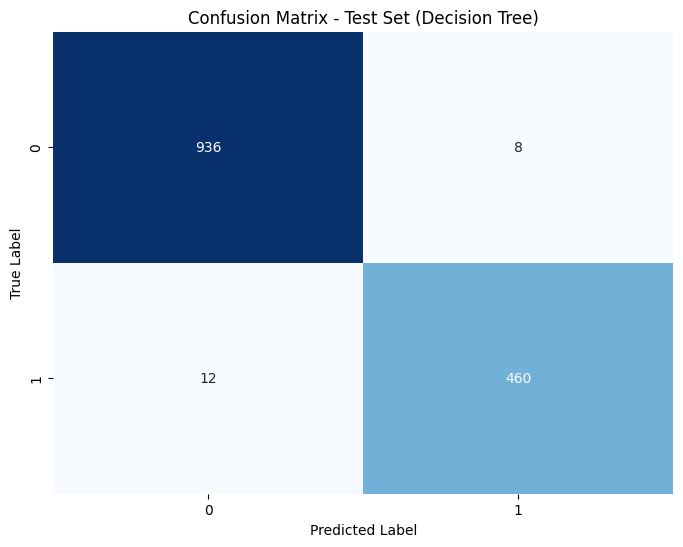

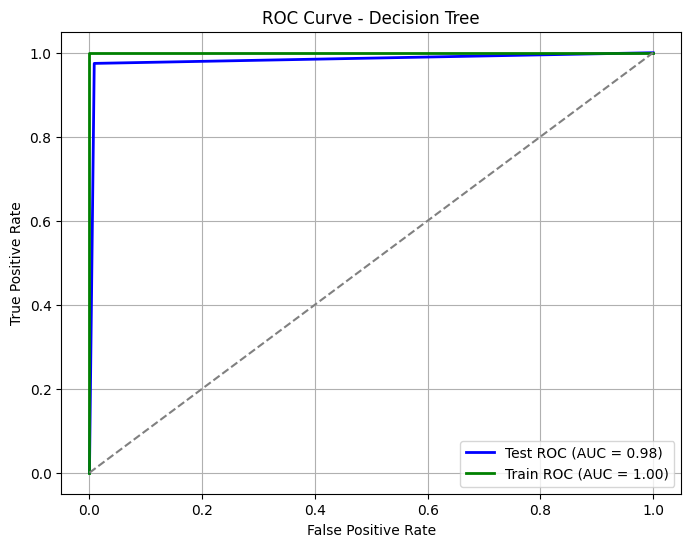

Train AUC Score: 1.0000
Test AUC Score:  0.9831

--- Random Forest ---
Train Accuracy: 1.0000
Test Accuracy:  0.9866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       944
         1.0       0.97      0.99      0.98       472

    accuracy                           0.99      1416
   macro avg       0.98      0.99      0.98      1416
weighted avg       0.99      0.99      0.99      1416

Confusion Matrix:
[[932  12]
 [  7 465]]


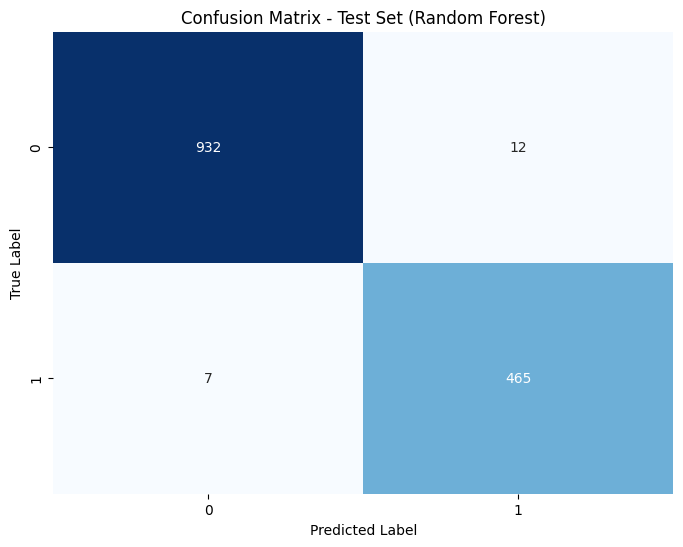

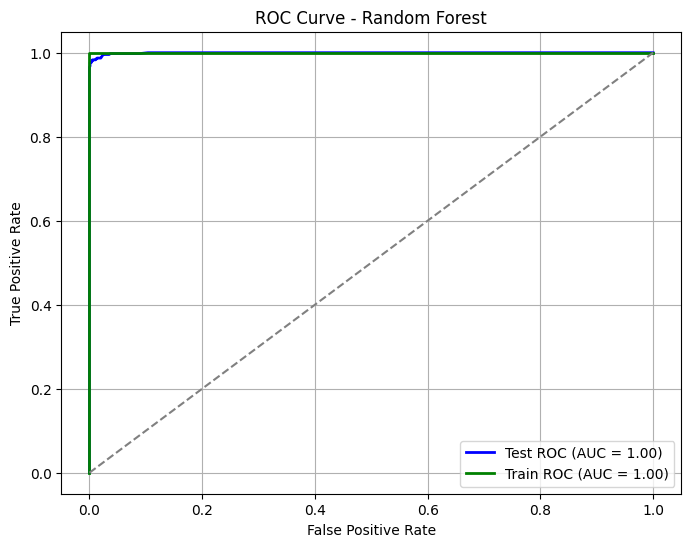

Train AUC Score: 1.0000
Test AUC Score:  0.9994

--- SVM ---
Best Params: {'C': 10, 'kernel': 'linear'}
Train Accuracy: 0.9329
Test Accuracy:  0.9174
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       944
         1.0       0.93      0.81      0.87       472

    accuracy                           0.92      1416
   macro avg       0.92      0.89      0.90      1416
weighted avg       0.92      0.92      0.92      1416

Confusion Matrix:
[[916  28]
 [ 89 383]]


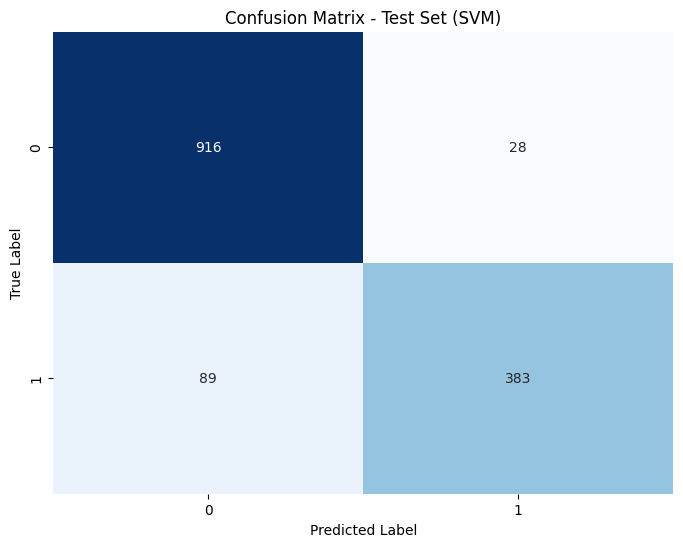

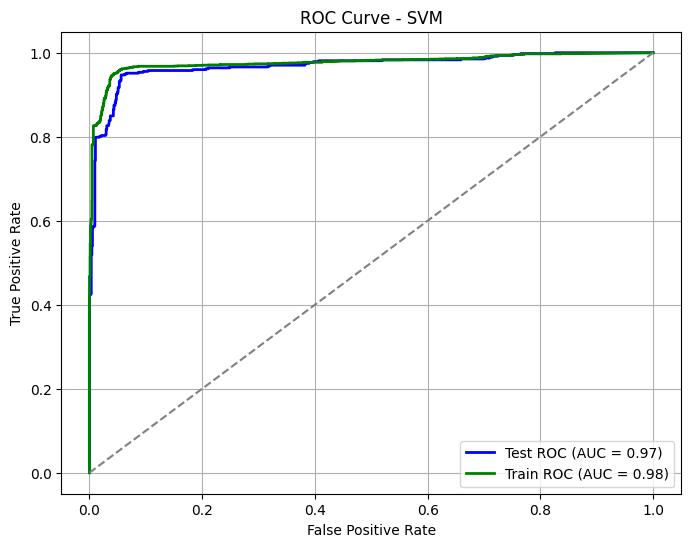

Train AUC Score: 0.9766
Test AUC Score:  0.9692

--- XGBoost ---
Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Train Accuracy: 0.9944
Test Accuracy:  0.9866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       944
         1.0       0.97      0.99      0.98       472

    accuracy                           0.99      1416
   macro avg       0.98      0.99      0.98      1416
weighted avg       0.99      0.99      0.99      1416

Confusion Matrix:
[[931  13]
 [  6 466]]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


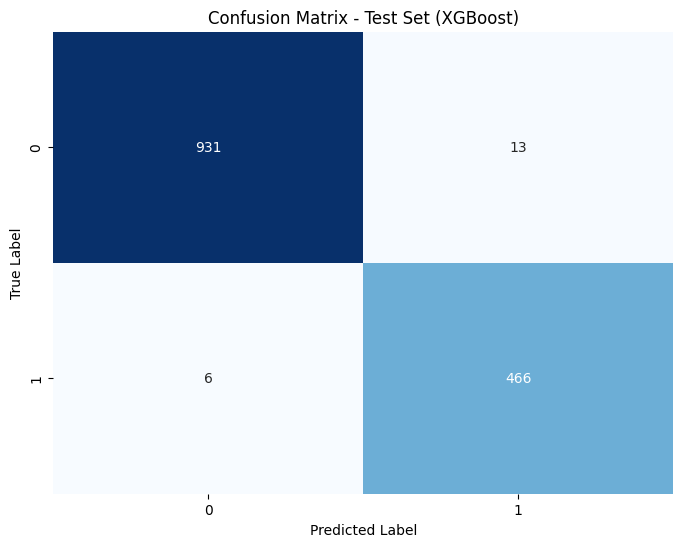

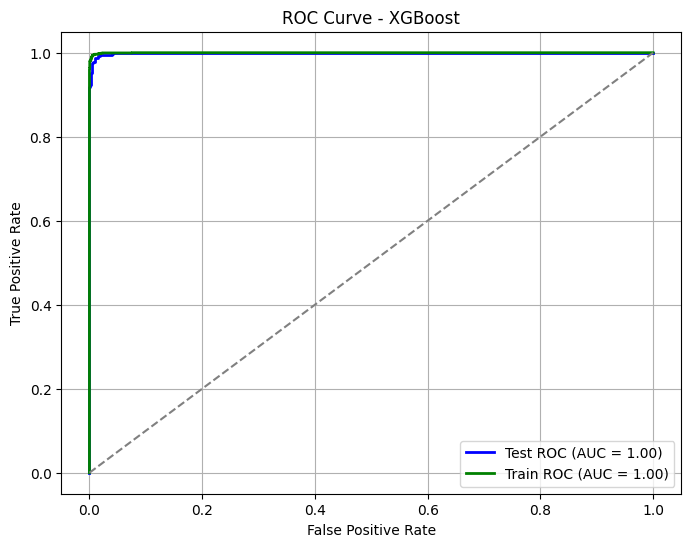

Train AUC Score: 0.9998
Test AUC Score:  0.9994

--- CatBoost ---
Best Params: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
Train Accuracy: 0.9988
Test Accuracy:  0.9866
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       944
         1.0       0.97      0.99      0.98       472

    accuracy                           0.99      1416
   macro avg       0.98      0.99      0.98      1416
weighted avg       0.99      0.99      0.99      1416

Confusion Matrix:
[[929  15]
 [  4 468]]


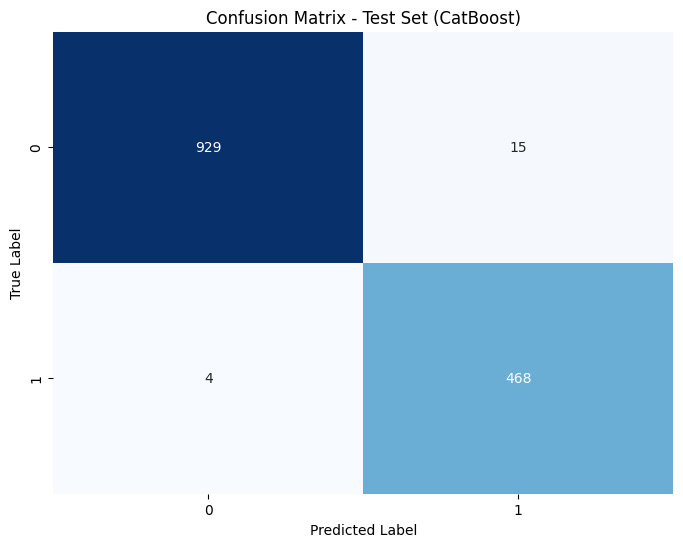

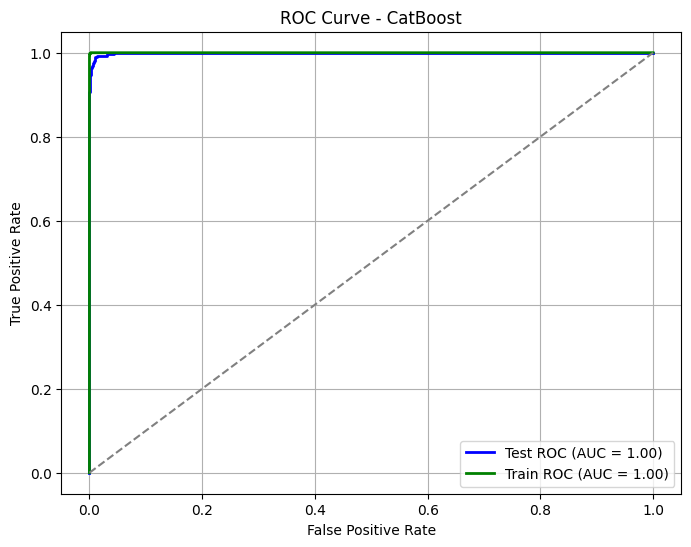

Train AUC Score: 1.0000
Test AUC Score:  0.9994


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report

trained_models = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    try:
        # Hyperparameter tuning if applicable
        if name in tuning_params:
            search = GridSearchCV(model, tuning_params[name], cv=3, scoring='accuracy', n_jobs=-1)
            search.fit(X_train, y_train, sample_weight=weights_train)
            model = search.best_estimator_
            print(f"Best Params: {search.best_params_}")
        else:
            model.fit(X_train, y_train, sample_weight=weights_train)

        trained_models[name] = model  # Save trained model

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy:  {test_acc:.4f}")

        # Classification report & confusion matrix
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - Test Set ({name})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # ROC Curve and AUC if predict_proba available
        if hasattr(model, "predict_proba"):
            y_pred_proba_test = model.predict_proba(X_test)[:, 1]
            y_pred_proba_train = model.predict_proba(X_train)[:, 1]

            fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
            fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)

            auc_test = auc(fpr_test, tpr_test)
            auc_train = auc(fpr_train, tpr_train)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC (AUC = {auc_test:.2f})')
            plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'Train ROC (AUC = {auc_train:.2f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc='lower right')
            plt.grid()
            plt.show()

            print(f"Train AUC Score: {auc_train:.4f}")
            print(f"Test AUC Score:  {auc_test:.4f}")
        else:
            print(f"{name} does not support probability estimates. Skipping ROC curve.")

    except Exception as e:
        print(f"{name} failed: {e}")
